# 1. Gaussian Experiments

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [3]:
def plot_boxplot(df_path):
    df_boxplot = pd.read_csv(df_path,
                            index_col=0
                            )
    fig, axes = plt.subplots(1, 3, figsize=(35, 8), sharey=True)

    sns.boxplot(ax=axes[0], data=df_boxplot, orient="v", palette="Set2", showfliers=False, x='Method', y='Spearman CC')
    axes[0].set_title("Spearman CC")

    sns.boxplot(ax=axes[1], data=df_boxplot, orient="v", palette="Set2", showfliers=False, x='Method', y='Pearson CC')
    axes[1].set_title("Pearson CC")

    sns.boxplot(ax=axes[2], data=df_boxplot, orient="v", palette="Set2", showfliers=False, x='Method', y='Kendall Tau')
    axes[2].set_title("Kendall Tau")

    plt.suptitle("Correlations", fontsize=16)
    

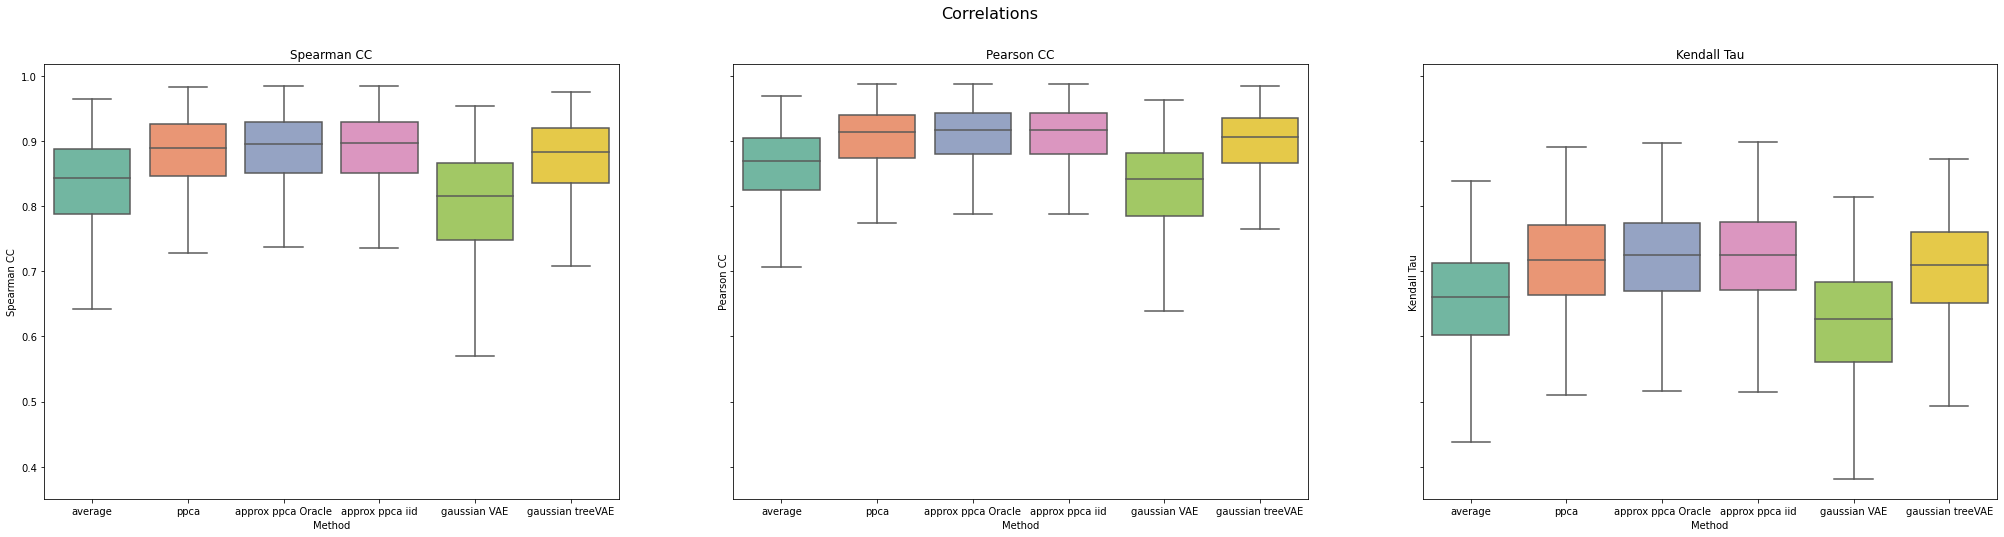

In [15]:
# data frame
plot_boxplot('/home/eecs/khalil.ouardini/Cassiopeia_Transcriptome/scvi/results/gaussian/100/high_fitness/correlations_gg')

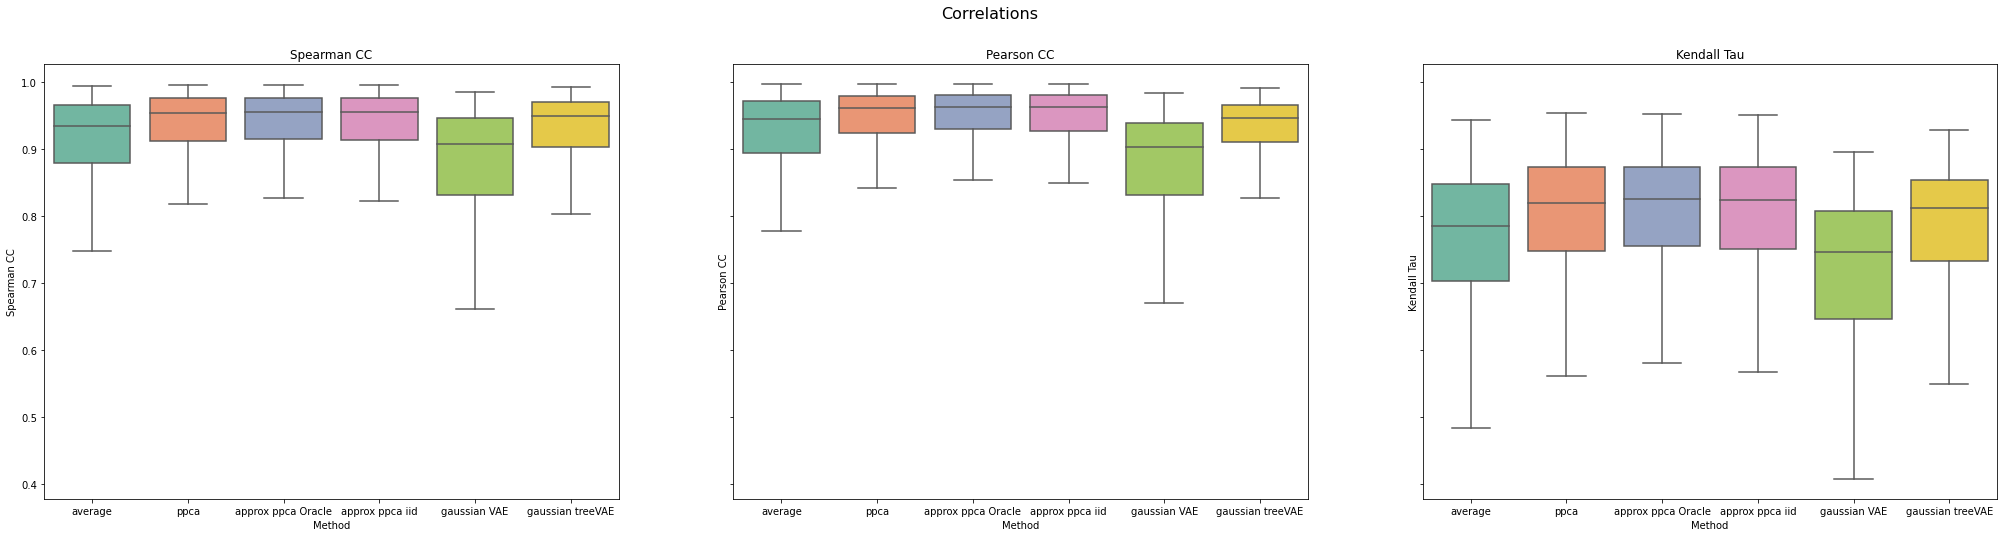

In [16]:
# data frame
plot_boxplot('/home/eecs/khalil.ouardini/Cassiopeia_Transcriptome/scvi/results/gaussian/100/high_fitness/correlations_ss')

In [17]:
df_mse = pd.read_csv('/home/eecs/khalil.ouardini/Cassiopeia_Transcriptome/scvi/results/gaussian/100/high_fitness/MSE',
                            index_col=0
                            )
df_mse.describe()

,average,ppca,approx ppca Oracle,approx ppca iid,gaussian VAE,gaussian treeVAE
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,6.347461,3.554306,3.419440,3.413383,11.242311,5.575353
std,0.635482,0.316728,0.275557,0.267250,3.239344,1.817980
min,5.682970,3.139214,3.040396,3.023118,7.925149,4.062145
25%,5.969595,3.369294,3.244862,3.247805,9.311064,4.321039
50%,6.198681,3.515413,3.374347,3.351354,10.205184,5.597317
75%,6.459694,3.666738,3.549079,3.524315,12.564285,5.836122
max,7.941243,4.253620,3.993760,3.993245,19.294707,10.455988


In [18]:
df_l1 = pd.read_csv('/home/eecs/khalil.ouardini/Cassiopeia_Transcriptome/scvi/results/gaussian/100/high_fitness/L1',
                            index_col=0
                            )
df_l1.describe()

,average,ppca,approx ppca Oracle,approx ppca iid,gaussian VAE,gaussian treeVAE
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,176.962512,139.725772,136.602678,136.641758,243.986102,160.968890
std,49.642067,19.685532,18.467854,18.784004,164.155783,46.715811
min,128.705005,118.479001,116.896057,114.611005,142.357298,120.860760
25%,142.230585,126.117041,122.914643,122.592471,165.787742,132.056460
50%,152.474714,136.295245,133.894317,134.278511,181.715931,140.276513
75%,209.429158,146.027560,143.491593,145.294093,246.244734,175.582668
max,288.055469,184.681817,179.578639,177.637687,722.635188,279.887778


# 2. Poisson Experiments

## 2.1 No Fitness, no binomial thinning

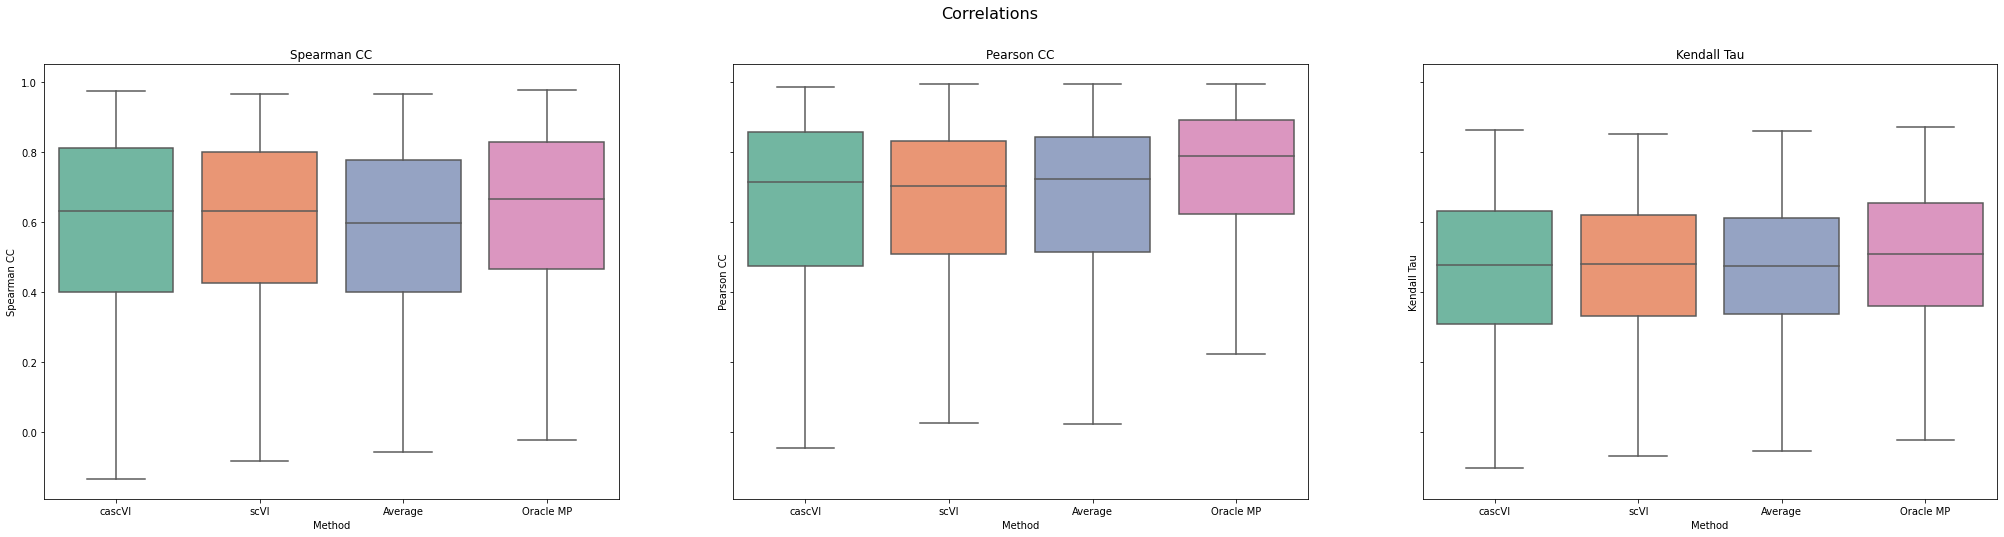

In [4]:
# data frame
plot_boxplot('/home/eecs/khalil.ouardini/Cassiopeia_Transcriptome/scvi/results/poisson/500/no_fitness/bin1.0/correlations_gg')

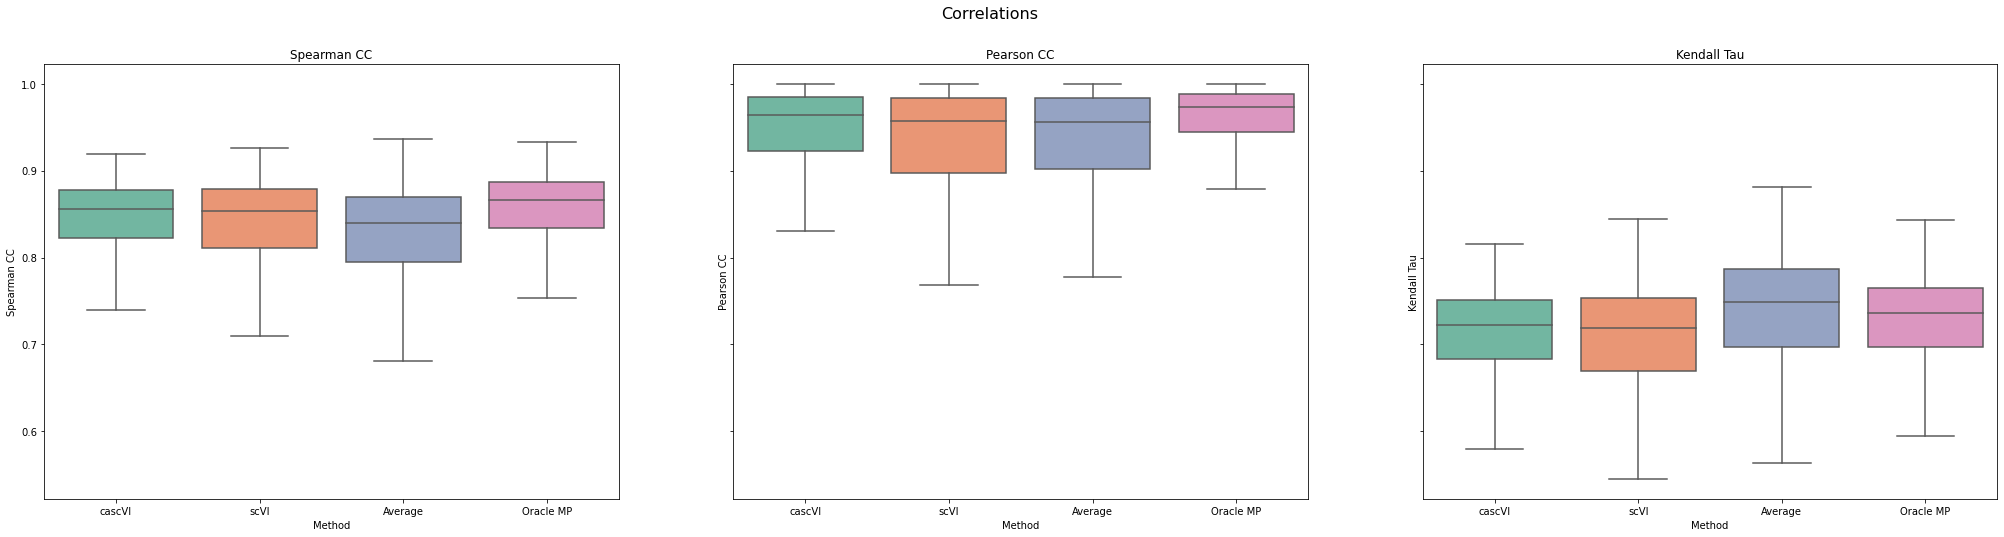

In [5]:
plot_boxplot('/home/eecs/khalil.ouardini/Cassiopeia_Transcriptome/scvi/results/poisson/500/no_fitness/bin1.0/correlations_ss')

## 2.2 Low Fitness, no binomial thinning

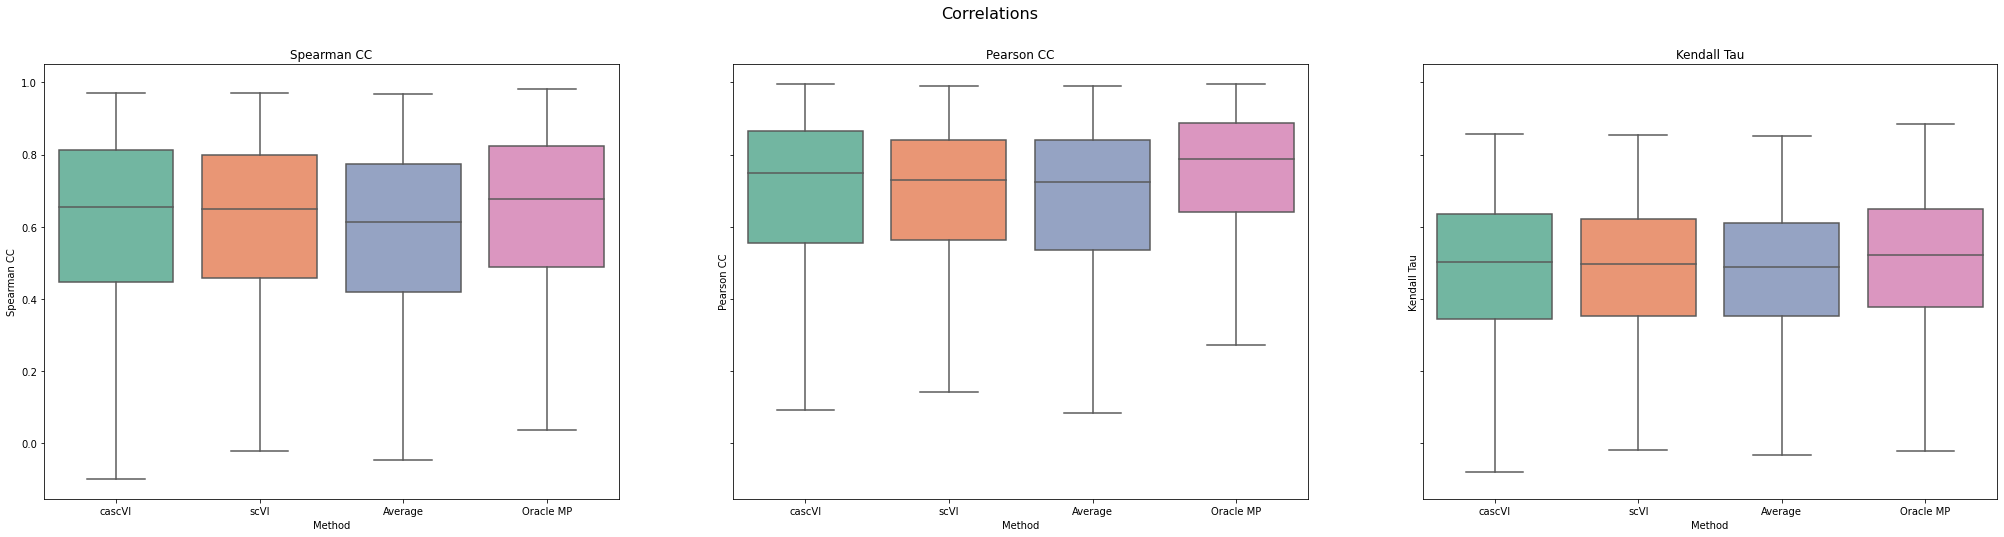

In [12]:
# data frame
plot_boxplot('/home/eecs/khalil.ouardini/Cassiopeia_Transcriptome/scvi/results/poisson/500/low_fitness/bin1.0/correlations_gg')

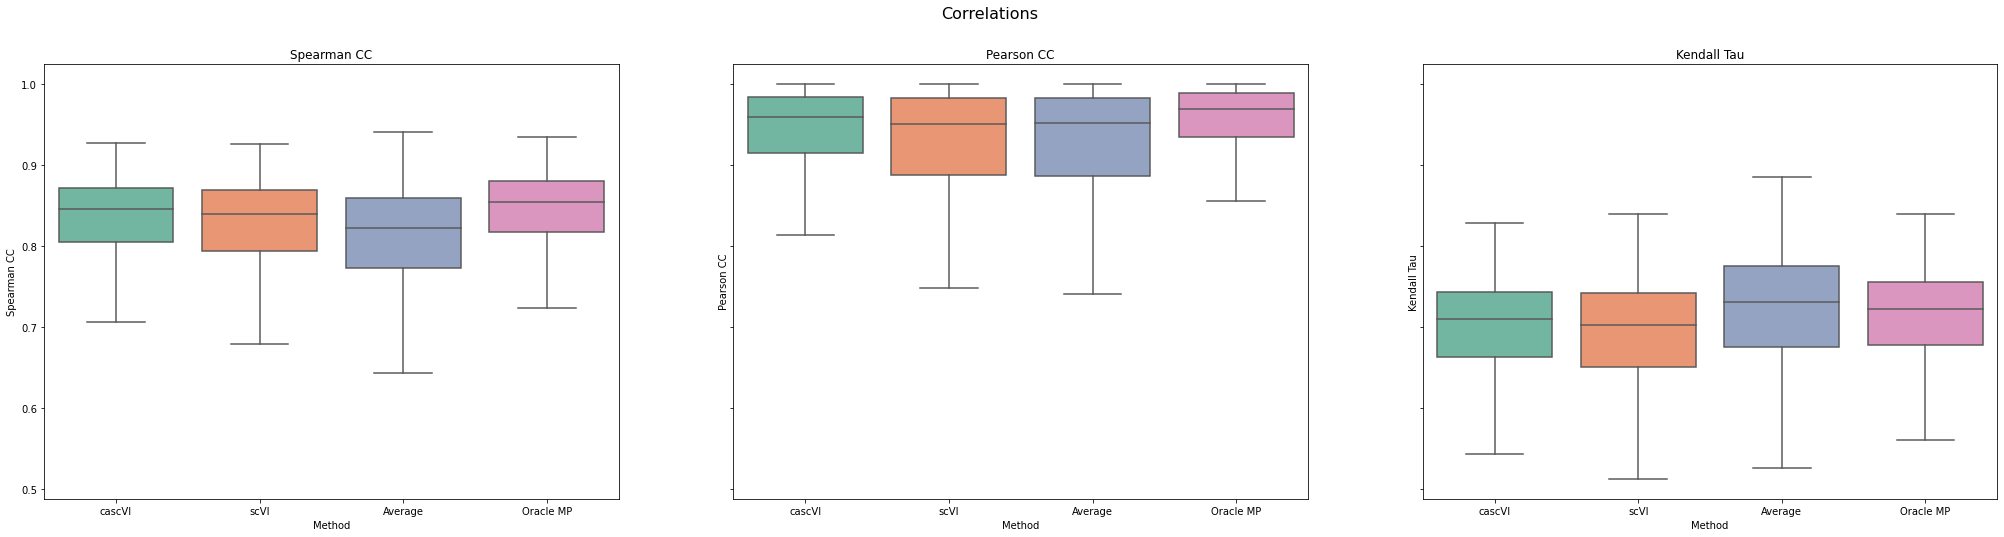

In [11]:
# data frame
plot_boxplot('/home/eecs/khalil.ouardini/Cassiopeia_Transcriptome/scvi/results/poisson/500/low_fitness/bin1.0/correlations_ss')

## 2.3 High fitness, no binomial thinning

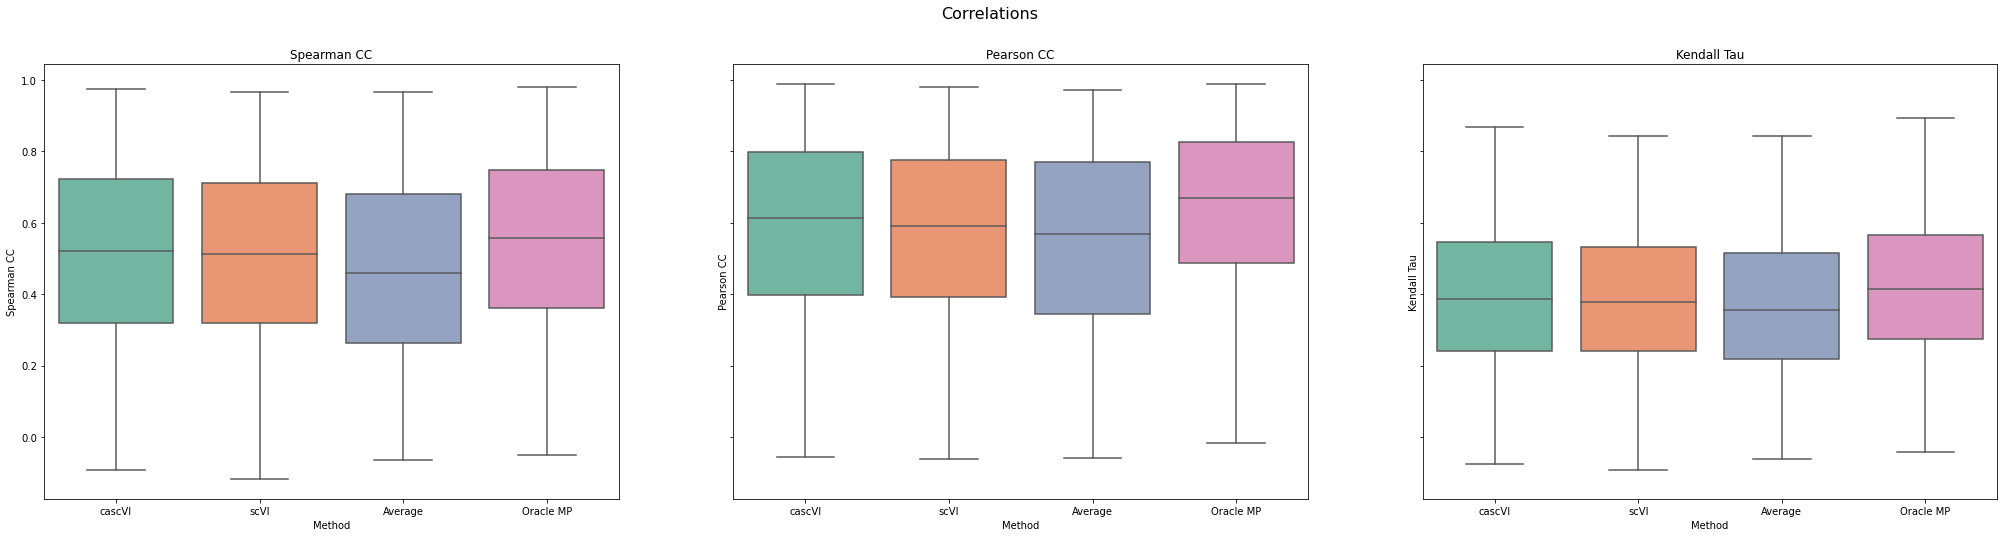

In [7]:
# data frame
plot_boxplot('/home/eecs/khalil.ouardini/Cassiopeia_Transcriptome/scvi/results/poisson/500/high_fitness/bin1.0/correlations_gg')

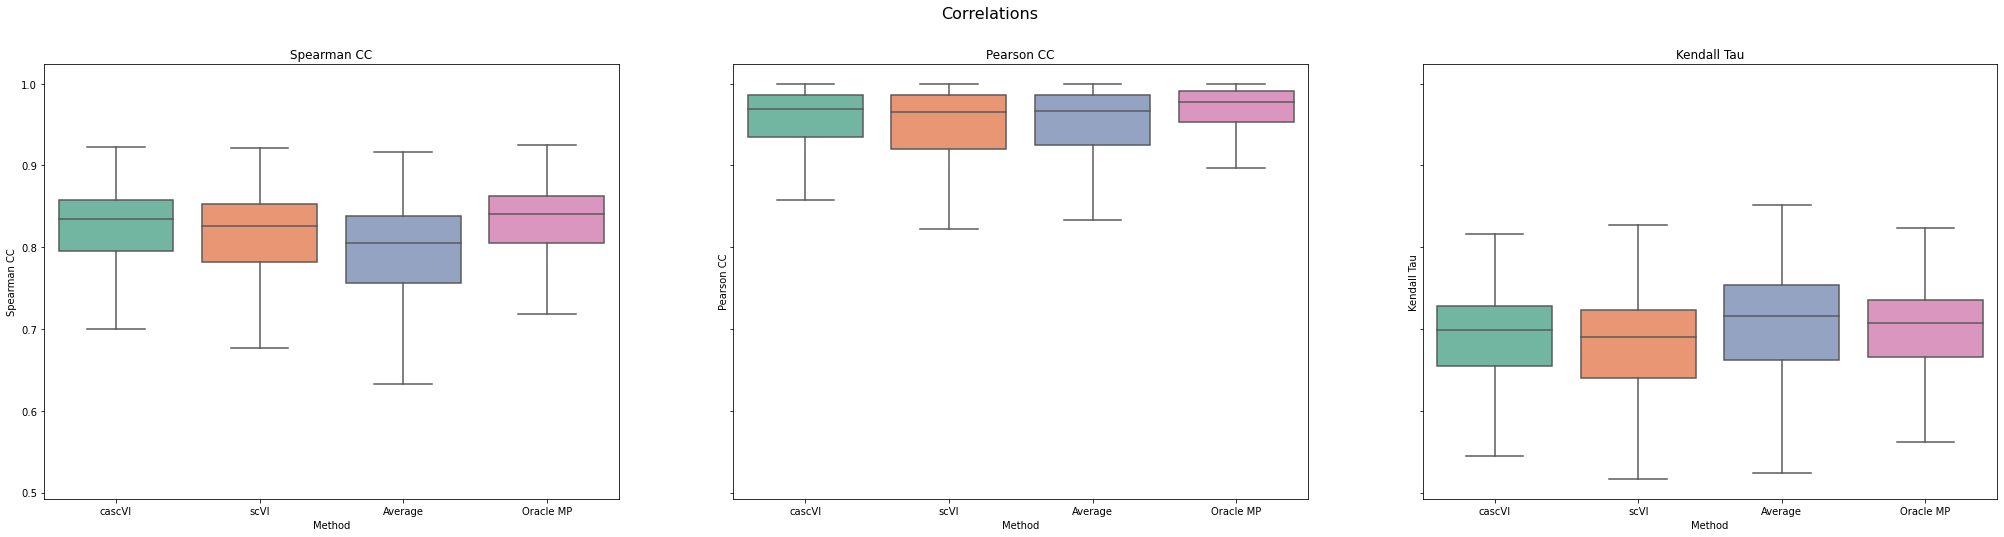

In [8]:
# data frame
plot_boxplot('/home/eecs/khalil.ouardini/Cassiopeia_Transcriptome/scvi/results/poisson/500/high_fitness/bin1.0/correlations_ss')

## 2.4 Effect of binomial thinning on performance

In [14]:
df = pd.read_csv("/home/eecs/khalil.ouardini/Cassiopeia_Transcriptome/scvi/results/poisson/500/low_fitness/bin0.1/correlations_gg")

,Unnamed: 0,Method,Spearman CC,Pearson CC,Kendall Tau
0,0,cascVI,0.263872,0.318800,0.210228
1,1,cascVI,0.141091,0.287171,0.112294
2,2,cascVI,0.388144,0.385364,0.303565
3,3,cascVI,0.431441,0.344862,0.329667
4,4,cascVI,0.124534,0.138932,0.100732
...,...,...,...,...,...
43995,43995,Oracle MP,0.289088,0.596048,0.230176
43996,43996,Oracle MP,0.791695,0.901356,0.648208
43997,43997,Oracle MP,0.025036,0.078920,0.020618
43998,43998,Oracle MP,0.759475,0.907284,0.606043


In [22]:
np.unique(df["Method"].values)

array(['Average', 'Oracle MP', 'cascVI', 'scVI'], dtype=object)

In [17]:
df[df["Method"]=='cascVI']['Spearman CC'].mean()

0.3208131586824556

In [44]:
def plot_binomial_thin(folder_path):
    metrics = ["Spearman CC", "Pearson CC", "Kendall Tau"]
    methods = ['Average', 'Oracle MP', 'cascVI', 'scVI']
    fig, axes = plt.subplots(1, 3, figsize=(35, 8), sharey=True)
    proportions = [1.0, 0.75, 0.5, 0.2, 0.1, 0.01]
    for i, metric in enumerate(metrics):
        for method in methods:
            values = []
            for p in proportions:
                file_path = os.path.join(folder_path, 'bin'+str(p))
                file_path = os.path.join(file_path, 'correlations_gg')
                df = pd.read_csv(file_path)
                values.append(df[df["Method"]==method][metric].mean())

            axes[i].plot(proportions, values, label=method,
                     linestyle='dashed', linewidth=2, markersize=12,
                     marker='o'
                     )
        axes[i].grid()
        axes[i].legend()
        axes[i].set_title(metric)
        axes[i].set_xlabel("proportion of binomial thinning"), axes[i].set_ylabel(metric)
    plt.suptitle("Binomial Thinning", fontsize=24)
    plt.show()

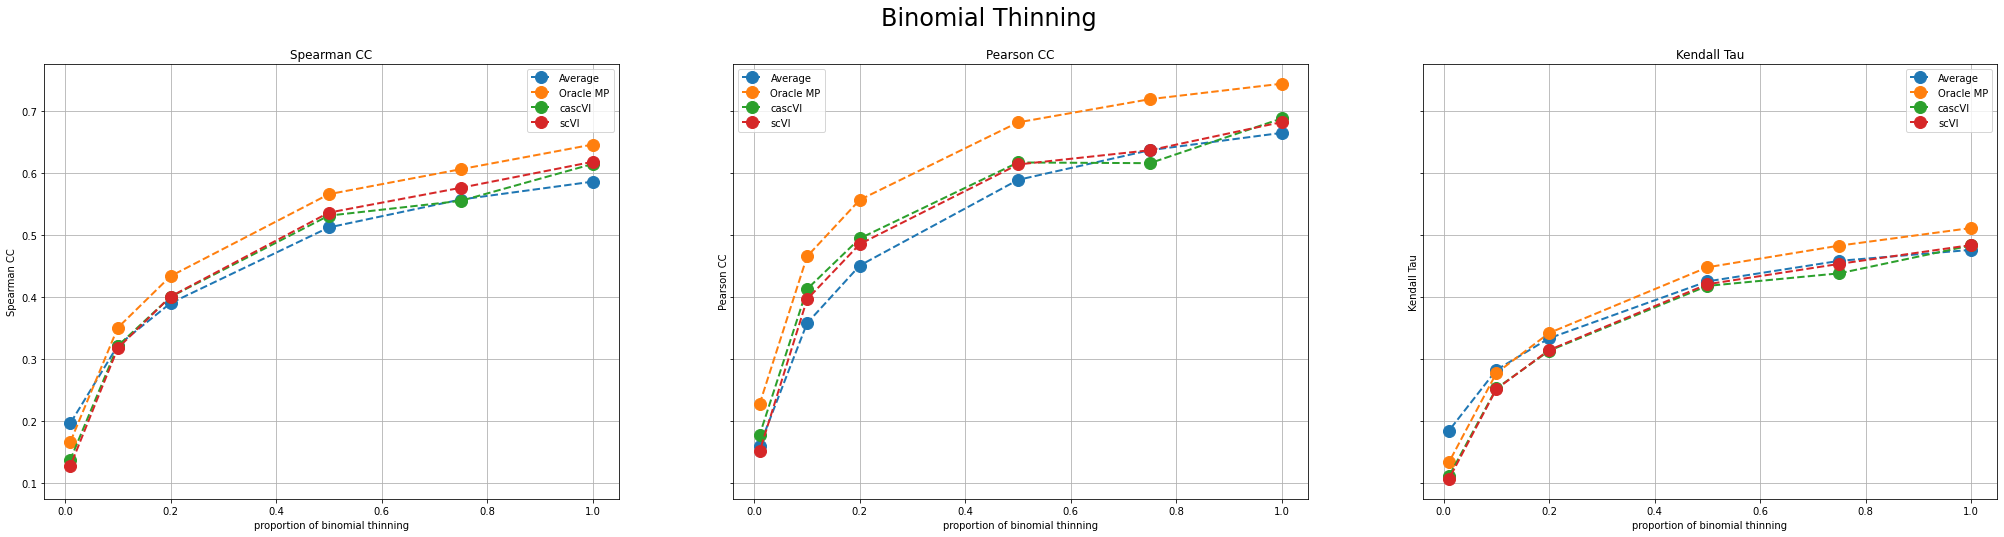

In [45]:
folder_path = "/home/eecs/khalil.ouardini/Cassiopeia_Transcriptome/scvi/results/poisson/500/low_fitness"

plot_binomial_thin(folder_path)